In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import shutil

In [2]:
def format_result(metrics, f1_only=False, reconstruction=False, MusicNet=False):
    mean = lambda x: np.mean(x)*100
    std = lambda x: np.std(x)*100    
    
    if f1_only==True:
        report_list = [
        metrics['metric/frame/f1'],        
        metrics['metric/note/f1'],
        metrics['metric/note-with-offsets/f1']
        ]
        
    else:
        if reconstruction==True:
            if MusicNet==True:
                report_list = [
                metrics['metric/MusicNet/micro_avg_P2'],
                metrics['metric/frame/accuracy_2'],
                metrics['metric/frame/f1_2'],        
                metrics['metric/note/precision_2'],
                metrics['metric/note/recall_2'],
                metrics['metric/note/f1_2'],
                metrics['metric/note-with-offsets/precision_2'],
                metrics['metric/note-with-offsets/recall_2'],
                metrics['metric/note-with-offsets/f1_2']
                ]                 
            else:
                report_list = [
                metrics['metric/frame/precision_2'],
                metrics['metric/frame/recall_2'],
                metrics['metric/frame/f1_2'],        
                metrics['metric/note/precision_2'],
                metrics['metric/note/recall_2'],
                metrics['metric/note/f1_2'],
                metrics['metric/note-with-offsets/precision_2'],
                metrics['metric/note-with-offsets/recall_2'],
                metrics['metric/note-with-offsets/f1_2']
                ]                
        else:
            if MusicNet==True:
                report_list = [
                metrics['metric/MusicNet/micro_avg_P'],
                metrics['metric/frame/accuracy'],
                metrics['metric/frame/f1'],        
                metrics['metric/note/precision'],
                metrics['metric/note/recall'],
                metrics['metric/note/f1'],
                metrics['metric/note-with-offsets/precision'],
                metrics['metric/note-with-offsets/recall'],
                metrics['metric/note-with-offsets/f1']
                ]  
            else:
                report_list = [
                metrics['metric/frame/precision'],
                metrics['metric/frame/recall'],
                metrics['metric/frame/f1'],        
                metrics['metric/note/precision'],
                metrics['metric/note/recall'],
                metrics['metric/note/f1'],
                metrics['metric/note-with-offsets/precision'],
                metrics['metric/note-with-offsets/recall'],
                metrics['metric/note-with-offsets/f1']
                ]    

    string = f''
    for i in report_list:
#         string += f'& ${mean(i):.1f} \pm {std(i):.1f}$ '
        string += f'& {mean(i):.1f} ± {std(i):.1f}' 
        
    return string

def get_datalist(files, mode='note'):
    means = []
    stds = []
    D = []
    for file in files:
        modifier = file.split('-')[-1]
        logdir = os.path.join('.', file, f'result_dict_no_infer-{modifier}')
        metrics = pickle.load(open(logdir, 'rb'))    
        means.append(np.mean(metrics[f'metric/{mode}/f1']))
        stds.append(np.std(metrics[f'metric/{mode}/f1']))
        D.append(int(file.split('-')[-1][2:]))
        
    return np.array(means), np.array(stds), D

def plot_result(means, std, ori_mean, ori_std, D, mode, legend=False):

    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.plot(D, means, 'o-')
    ax.hlines(ori_mean, 0, 30, 'r', '--')

    ax.fill_between(D,means-std,means+std,alpha=0.2)
    ax.fill_between(D,ori_mean-ori_std,ori_mean+ori_std,alpha=0.1)

#     ax.set_ylim(0.1, 0.8)
    ax.set_xlim(0, 31)

    ax.set_xlabel('Attention size (D)', size=14)
    ax.set_ylabel(f'{mode} F1', size=14)
    
    if legend==True:
        ax.legend(['Linear model + Attention', 'Linear model'], loc='lower left')
        

    # change the color of the top and right spines to opaque gray
    ax.spines['right'].set_color((.8,.8,.8))
    ax.spines['top'].set_color((.8,.8,.8))

    # add more ticks
    ax.set_xticks(D)

    # remove tick marks
    # ax.xaxis.set_tick_params(size=0)
    # ax.yaxis.set_tick_params(size=0)
    ax.tick_params(axis='both', which='major', labelsize=12, size=0)

    # tweak the axis labels
    xlab = ax.xaxis.get_label()
    ylab = ax.yaxis.get_label()


    # set the grid on
    ax.grid('on')

In [3]:
files = ['Simple-MAPS-Mel-Null-D_1',
         'Simple-MAPS-Mel-Null-D_5',
         'Simple-MAPS-Mel-Null-D_10',
         'Simple-MAPS-Mel-Null-D_15',
         'Simple-MAPS-Mel-Null-D_20',
         'Simple-MAPS-Mel-Null-D_25',
         'Simple-MAPS-Mel-Null-D_30']

In [4]:
note_means, note_stds, D = get_datalist(files) 
frame_means, frame_stds, D = get_datalist(files, 'frame') 
offset_means, offset_stds, D = get_datalist(files, 'note-with-offsets') 

original_files = ['Simple-MAPS-Mel-Null-D_0']
ori_note_mean, ori_note_std, _ = get_datalist(original_files)
ori_frame_mean, ori_frame_std, _ = get_datalist(original_files, 'frame')
ori_offset_mean, ori_offset_std, _ = get_datalist(original_files, 'note-with-offsets') 

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


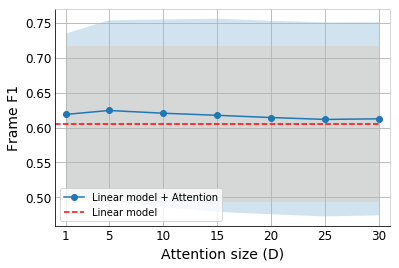

In [5]:
plot_result(frame_means, frame_stds, ori_frame_mean, ori_frame_std, D, 'Frame', True)

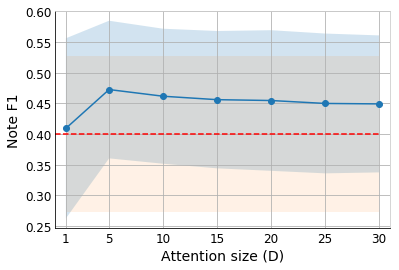

In [6]:
plot_result(note_means, note_stds, ori_note_mean, ori_note_std, D, 'Note')

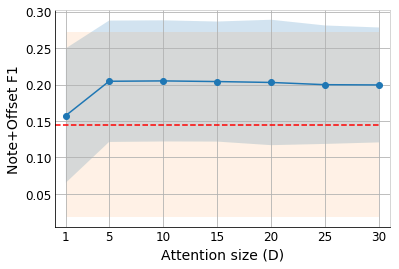

In [7]:
plot_result(offset_means, offset_stds, ori_offset_mean, ori_note_std, D, 'Note+Offset')